In [17]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict,Literal,Annotated
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage,BaseMessage
from langgraph.checkpoint.memory import InMemorySaver

In [18]:
load_dotenv()

True

In [19]:
model=ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.7,  
)

In [20]:
model.invoke("hello bro")

AIMessage(content="Hey there! 👋\n\nI'm an AI, ready to help. What's up? How can I assist you today?", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b7df1-f0eb-7c61-91a6-575bfdd7ce44-0', usage_metadata={'input_tokens': 3, 'output_tokens': 157, 'total_tokens': 160, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 130}})

In [21]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explanation:str

In [22]:
def genJoke(state:JokeState):
    promt=f'provide me a joke around this topic {state['topic']}'
    response=model.invoke(promt)
    return {'joke':response.content}

In [23]:
def genexplaination(state:JokeState):
     promt=f'provide me a explanation around this joke {state['joke']}'
     response=model.invoke(promt)
     return {'explanation':response.content}

In [25]:
graph=StateGraph(JokeState)
graph.add_node('genJoke',genJoke)
graph.add_node('genexplaination',genexplaination)


graph.add_edge(START,'genJoke')
graph.add_edge('genJoke','genexplaination')
graph.add_edge('genexplaination',END)

checkpointer=InMemorySaver()
workflow=graph.compile(checkpointer=checkpointer)

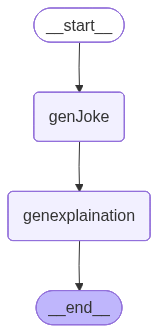

In [27]:
workflow

In [28]:
config={'configurable':{"thread_id":"1"}}
workflow.invoke({'topic':'suit up barney stinsion'},config=config)

{'topic': 'suit up barney stinsion',
 'joke': 'Why did Barney Stinson get kicked out of the casual Friday office party?\n\nBecause he kept yelling, "How can we have a legen... wait for it... dary time if you\'re all dressed like you\'re about to trim hedges?! SUIT UP!"',
 'explanation': 'This joke perfectly encapsulates Barney Stinson\'s character from *How I Met Your Mother*. Here\'s why it\'s funny and makes sense:\n\n1.  **Barney\'s Obsession with Suits:** Barney\'s most iconic catchphrase is "Suit Up!" He believes that suits are the pinnacle of style, power, professionalism, and fun. He sees them as essential for any truly "legendary" experience. He views casual attire as inherently inferior, unprofessional, and incapable of leading to anything epic.\n\n2.  **"Legen... wait for it... dary!":** This is his signature phrase for anything amazing, incredible, or over-the-top. His goal in life is to live a "legendary" existence, and in his mind, that simply cannot happen in jeans and a 

In [29]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'suit up barney stinsion', 'joke': 'Why did Barney Stinson get kicked out of the casual Friday office party?\n\nBecause he kept yelling, "How can we have a legen... wait for it... dary time if you\'re all dressed like you\'re about to trim hedges?! SUIT UP!"', 'explanation': 'This joke perfectly encapsulates Barney Stinson\'s character from *How I Met Your Mother*. Here\'s why it\'s funny and makes sense:\n\n1.  **Barney\'s Obsession with Suits:** Barney\'s most iconic catchphrase is "Suit Up!" He believes that suits are the pinnacle of style, power, professionalism, and fun. He sees them as essential for any truly "legendary" experience. He views casual attire as inherently inferior, unprofessional, and incapable of leading to anything epic.\n\n2.  **"Legen... wait for it... dary!":** This is his signature phrase for anything amazing, incredible, or over-the-top. His goal in life is to live a "legendary" existence, and in his mind, that simply cannot hap

In [30]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'suit up barney stinsion', 'joke': 'Why did Barney Stinson get kicked out of the casual Friday office party?\n\nBecause he kept yelling, "How can we have a legen... wait for it... dary time if you\'re all dressed like you\'re about to trim hedges?! SUIT UP!"', 'explanation': 'This joke perfectly encapsulates Barney Stinson\'s character from *How I Met Your Mother*. Here\'s why it\'s funny and makes sense:\n\n1.  **Barney\'s Obsession with Suits:** Barney\'s most iconic catchphrase is "Suit Up!" He believes that suits are the pinnacle of style, power, professionalism, and fun. He sees them as essential for any truly "legendary" experience. He views casual attire as inherently inferior, unprofessional, and incapable of leading to anything epic.\n\n2.  **"Legen... wait for it... dary!":** This is his signature phrase for anything amazing, incredible, or over-the-top. His goal in life is to live a "legendary" existence, and in his mind, that simply cannot ha

In [31]:
from langchain_core.messages import HumanMessage

for event in workflow.stream(
    {
        "messages": [HumanMessage(content="bro you are legen wait for it dary")]
    },
    config={"configurable": {"thread_id": "1"}}
):
    print(event)


{'genJoke': {'joke': 'Why did Barney Stinson wear a full tuxedo to his own online poker game?\n\nBecause even through a webcam, you still have to *suit up* for a legen—wait for it—dary bluff!'}}
{'genexplaination': {'explanation': 'This joke perfectly encapsulates the character of **Barney Stinson** from "How I Met Your Mother." Here\'s why it\'s funny:\n\n1.  **Barney\'s Obsession with Suits:** Barney\'s most famous catchphrase is "Suit up!" He believes that a suit is the ultimate symbol of sophistication, success, and readiness for *any* occasion, no matter how mundane or extraordinary. He wears suits for everything, from going to a strip club to playing laser tag, and certainly for more "serious" activities like poker.\n\n2.  **The Absurdity of the Context:**\n    *   **Online Poker:** The key here is "online poker." In an online game, most people are casually dressed, maybe in pajamas or a T-shirt, because only their face (if even that) is visible on a webcam. The full tuxedo is co